In [0]:
#1. Generate noisy data samples from the linear function y = 3x + 4
import numpy

num_samples = 100

X = numpy.random.rand(num_samples, 1)
Y = 4 + 3*X
noise = numpy.random.randn(num_samples, 1)
Y_withNoise = Y + noise

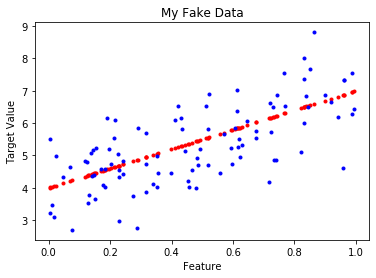

In [0]:
#2. Visualize our data
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, Y, "r.")
plt.plot(X, Y_withNoise, "b.")
plt.xlabel("Feature")
plt.ylabel("Target Value")
plt.title("My Fake Data")
plt.show()

In [0]:
#3. Create train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_withNoise, test_size=0.3, random_state = 10)
print("Number samples in training: ", len(X_train))
print("Number samples in testing: ", len(X_test))


Number samples in training:  70
Number samples in testing:  30


In [0]:
# 4-5. Train linear regression model
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, Y_train)
print("Slope/Coefficient: ", lr_model.coef_)
print("Intercept: ", lr_model.intercept_)

Slope/Coefficient:  [[2.64042259]]
Intercept:  [4.13879796]


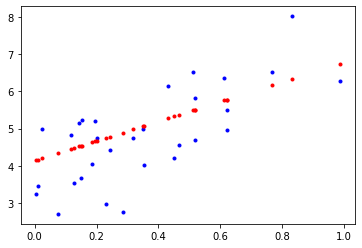

In [0]:
Y_predicted = lr_model.intercept_ + lr_model.coef_*X_test
plt.plot(X_test, Y_test, "b.")
plt.plot(X_test, Y_predicted, "r.")

In [0]:
# 7. Evaluate model performance on the test dataset
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_predicted)

0.7845449300817272

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_predicted)

0.8573985929169494

In [0]:
error = Y_predicted - Y_test
print(error)

[[-0.31031752]
 [-0.87814242]
 [ 0.58581675]
 [ 2.12911172]
 [ 0.46591285]
 [-0.54297215]
 [-0.38696613]
 [ 0.80255865]
 [ 0.27137408]
 [ 0.07150607]
 [-0.60253575]
 [ 0.81092836]
 [ 1.64071155]
 [ 0.93319286]
 [-0.67733738]
 [-0.77775385]
 [ 1.78434266]
 [ 0.91704522]
 [ 0.70485779]
 [ 0.81642448]
 [-0.64434502]
 [-0.35224732]
 [-1.69132586]
 [ 1.0486473 ]
 [ 0.87632163]
 [-0.07261908]
 [ 0.23944801]
 [ 1.11616698]
 [-1.0264862 ]
 [ 0.35893227]]


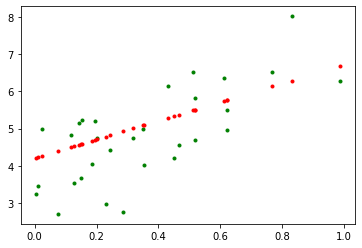

In [0]:
# Train and visualize Ridge Regression results
ridge_model = linear_model.Ridge(alpha=0.3)
ridge_model.fit(X_train, Y_train)
ridge_predicted = ridge_model.predict(X_test)
plt.plot( X_test, Y_test, "g.")
plt.plot(X_test, ridge_predicted, "r.")

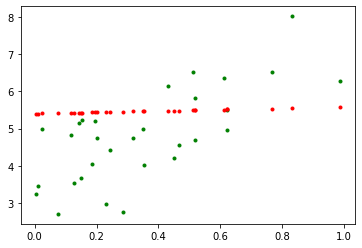

In [0]:
# Train and visualize Lasso regression model
lasso_model = linear_model.Lasso(alpha=0.2)
lasso_model.fit(X_train, Y_train)
lasso_predicted = lasso_model.predict(X_test)
plt.plot(X_test, Y_test, "g.")
plt.plot(X_test, lasso_predicted, "r.")

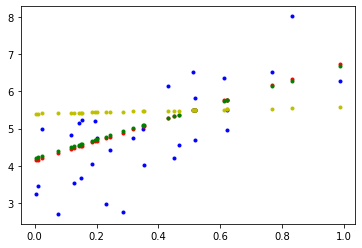

In [0]:
# Visualize results from linear, ridge and regression models
plt.plot(X_test, Y_test, "b.")
plt.plot(X_test, Y_predicted, "r.")
plt.plot(X_test, ridge_predicted, "g.")
plt.plot(X_test, lasso_predicted, "y.")

In [0]:
# Train with polynomial features for the model
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X.shape)
print(X_poly.shape)

(100, 1)
(100, 2)


In [0]:
X_polyTrain, X_polyTest, Y_polyTrain, Y_poly_Test = train_test_split(X_poly, Y_withNoise, test_size = 0.3, random_state = 10)
poly_model = linear_model.LinearRegression()
poly_model.fit(X_polyTrain, Y_polyTrain)
Y_polyPredicted = poly_model.predict(X_polyTest)